In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load data
df = pd.read_csv('/content/Netflix Dataset.csv')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# check dataset info
print(df.shape)
df.info()

(7789, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [5]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [7]:
# convert date column
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='mixed')
df['Year'] = df['Release_Date'].dt.year

In [8]:
# remove rows with missing year or category
df = df.dropna(subset=['Year', 'Category'])
print(f"Total records: {len(df)}")

Total records: 7779


## Objective 1: Movies vs TV Shows Analysis

In [9]:
# count movies and tv shows
content_type = df['Category'].value_counts()
print(content_type)
print()
print(df['Category'].value_counts(normalize=True)*100)

Category
Movie      5379
TV Show    2400
Name: count, dtype: int64

Category
Movie      69.147705
TV Show    30.852295
Name: proportion, dtype: float64


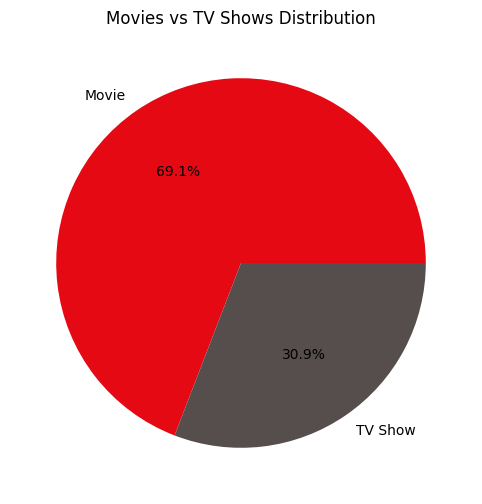

In [10]:
# plot pie chart
plt.figure(figsize=(8,6))
plt.pie(content_type, labels=content_type.index, autopct='%1.1f%%', colors=['#E50914', '#564d4d'])
plt.title('Movies vs TV Shows Distribution')
plt.show()

In [11]:
# yearly trend
yearly = df.groupby(['Year', 'Category']).size().unstack(fill_value=0)
yearly.tail(10)

Category,Movie,TV Show
Year,,
2012.0,3,0
2013.0,6,5
2014.0,19,6
2015.0,58,30
2016.0,258,185
2017.0,864,361
2018.0,1255,430
2019.0,1498,656
2020.0,1313,697


<Figure size 1200x600 with 0 Axes>

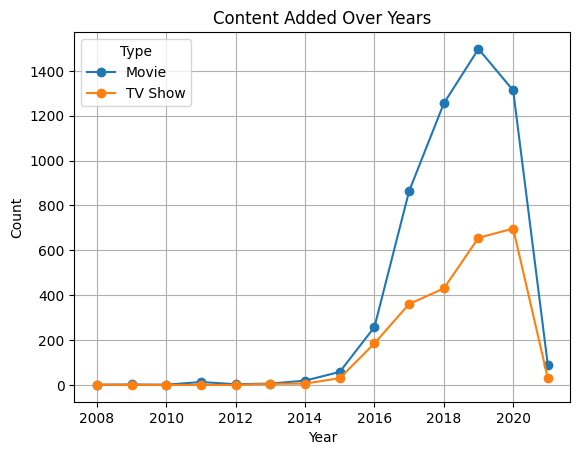

In [12]:
plt.figure(figsize=(12,6))
yearly.plot(marker='o')
plt.title('Content Added Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Type')
plt.grid(True)
plt.show()

## Objective 2: Genre Analysis

In [13]:
# extract genres from Type column
genres_list = []
for genre in df['Type'].dropna():
    g = str(genre).split(',')
    for item in g:
        genres_list.append(item.strip())

In [14]:
genre_count = pd.Series(genres_list).value_counts()
print("Top 15 Genres:")
print(genre_count.head(15))

Top 15 Genres:
International Movies        2437
Dramas                      2108
Comedies                    1472
International TV Shows      1198
Documentaries                786
Action & Adventure           721
TV Dramas                    703
Independent Movies           675
Children & Family Movies     532
Romantic Movies              531
TV Comedies                  518
Thrillers                    492
Crime TV Shows               426
Kids' TV                     412
Docuseries                   352
Name: count, dtype: int64


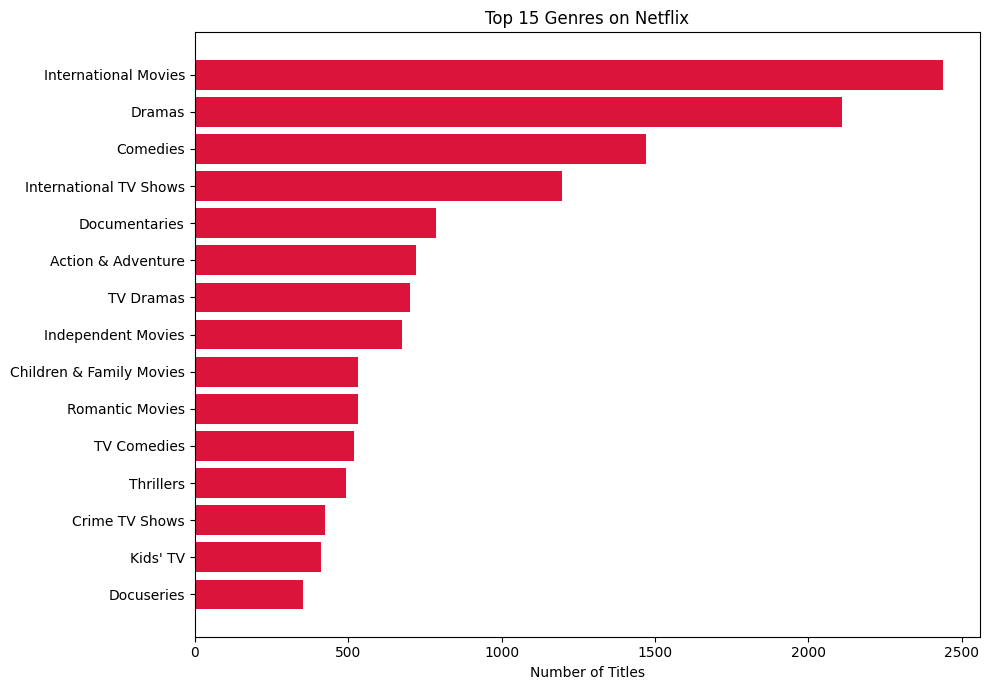

In [15]:
# plot top genres
plt.figure(figsize=(10,7))
top15 = genre_count.head(15)
plt.barh(range(len(top15)), top15.values, color='crimson')
plt.yticks(range(len(top15)), top15.index)
plt.xlabel('Number of Titles')
plt.title('Top 15 Genres on Netflix')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [17]:
# genre trends over time
genre_year = []
for i, row in df.iterrows():
    yr = row['Year']
    genres = str(row['Type']).split(',')
    for g in genres:
        genre_year.append({'Year': yr, 'Genre': g.strip()})

genre_df = pd.DataFrame(genre_year)

In [18]:
# get top 5 genres trend
top5_genres = genre_count.head(5).index.tolist()
genre_trend = genre_df[genre_df['Genre'].isin(top5_genres)]
genre_pivot = genre_trend.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

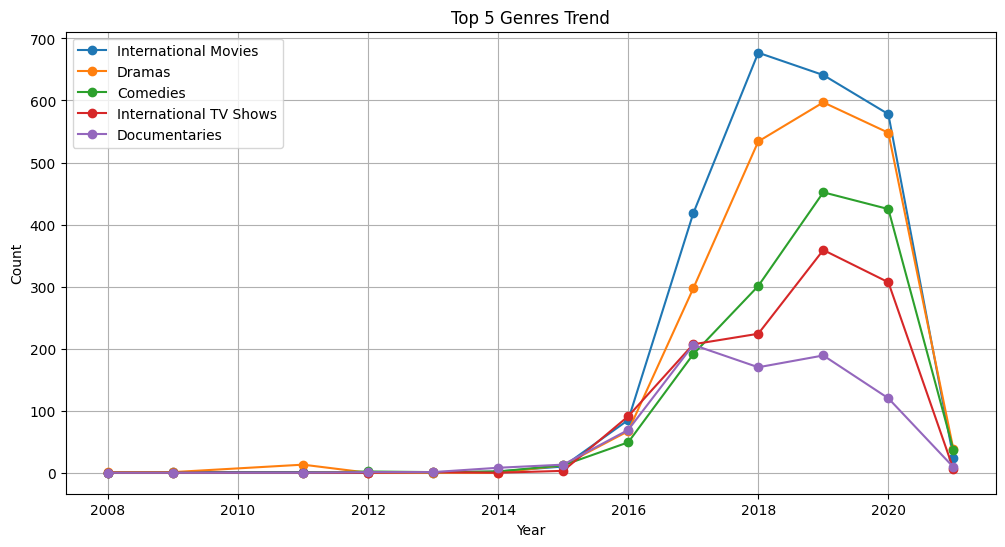

In [19]:
plt.figure(figsize=(12,6))
for g in top5_genres:
    if g in genre_pivot.columns:
        plt.plot(genre_pivot.index, genre_pivot[g], marker='o', label=g)
plt.title('Top 5 Genres Trend')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

## Objective 3: Country-wise Analysis

In [20]:
# extract countries
countries_list = []
for country in df['Country'].dropna():
    c = str(country).split(',')
    for item in c:
        countries_list.append(item.strip())

In [21]:
country_count = pd.Series(countries_list).value_counts()
print("Top 15 Countries:")
print(country_count.head(15))

Top 15 Countries:
United States     3292
India              990
United Kingdom     722
Canada             412
France             349
Japan              286
Spain              215
South Korea        212
Germany            199
Mexico             154
China              147
Australia          143
Egypt              110
Turkey             108
Hong Kong          102
Name: count, dtype: int64


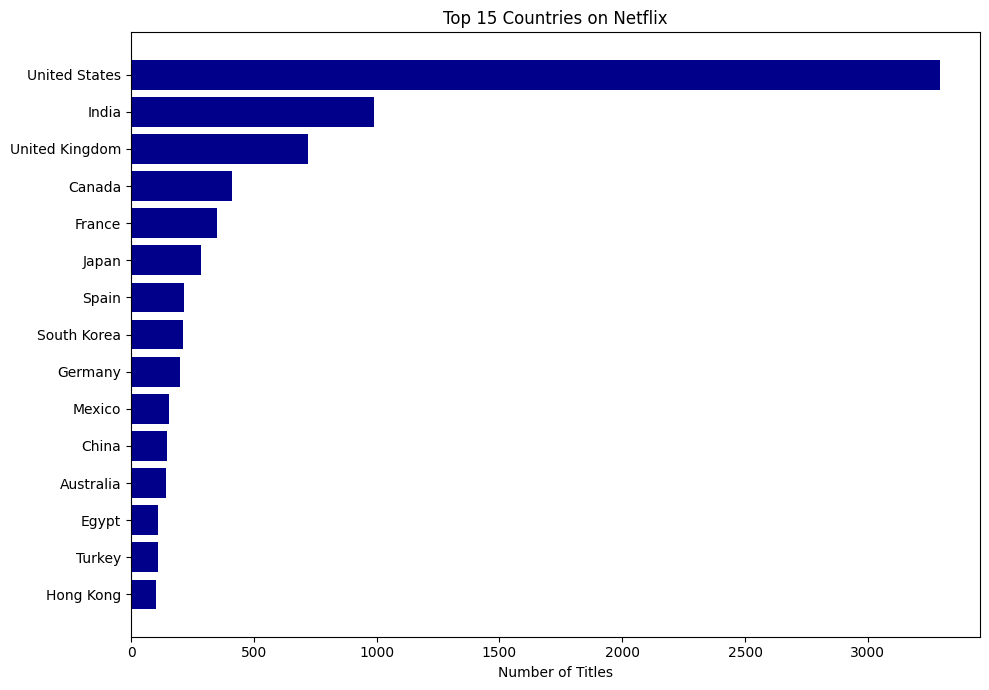

In [22]:
# plot countries
plt.figure(figsize=(10,7))
top15_country = country_count.head(15)
plt.barh(range(len(top15_country)), top15_country.values, color='darkblue')
plt.yticks(range(len(top15_country)), top15_country.index)
plt.xlabel('Number of Titles')
plt.title('Top 15 Countries on Netflix')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [25]:
# country trends
country_year = []
for i, row in df.iterrows():
    yr = row['Year']
    countries = str(row['Country']).split(',')
    for c in countries:
        country_year.append({'Year': yr, 'Country': c.strip()})

country_df = pd.DataFrame(country_year)

In [26]:
top5_countries = country_count.head(5).index.tolist()
country_trend = country_df[country_df['Country'].isin(top5_countries)]
country_pivot = country_trend.groupby(['Year', 'Country']).size().unstack(fill_value=0)

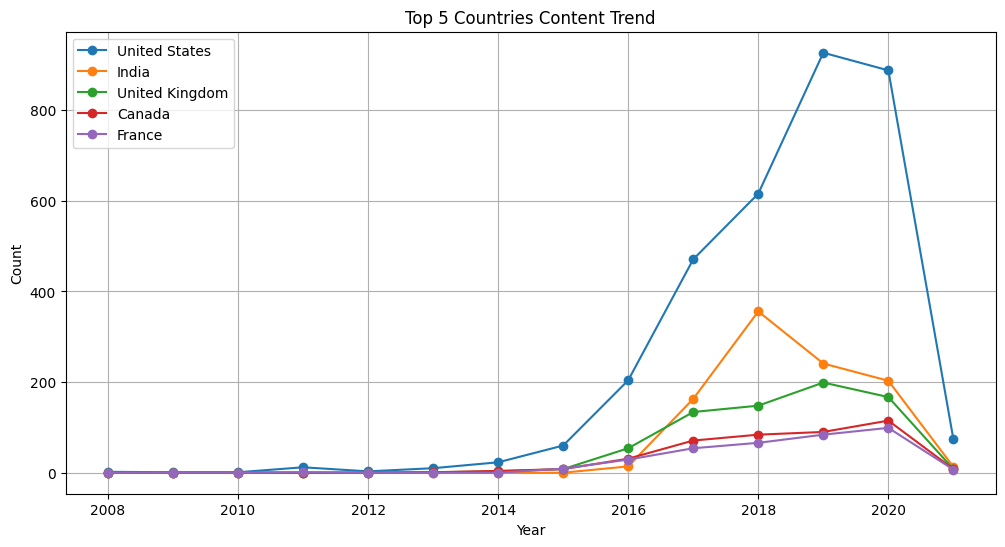

In [27]:
plt.figure(figsize=(12,6))
for c in top5_countries:
    if c in country_pivot.columns:
        plt.plot(country_pivot.index, country_pivot[c], marker='o', label=c)
plt.title('Top 5 Countries Content Trend')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

## Summary Findings

In [28]:
print(f"Total Content: {len(df)}")
print(f"Movies: {content_type.get('Movie', 0)}")
print(f"TV Shows: {content_type.get('TV Show', 0)}")
print(f"Top Genre: {genre_count.index[0]}")
print(f"Top Country: {country_count.index[0]}")

Total Content: 7779
Movies: 5379
TV Shows: 2400
Top Genre: International Movies
Top Country: United States


## Expected Outcomes & Strategic Recommendations

In [29]:
# analyze content strategy evolution
recent_data = df[df['Year'] >= 2018]
old_data = df[df['Year'] < 2018]

print("Content Strategy Evolution:")
print("\nRecent Years (2018+):")
print(recent_data['Category'].value_counts())
print("\nEarlier Years (before 2018):")
print(old_data['Category'].value_counts())

Content Strategy Evolution:

Recent Years (2018+):
Category
Movie      4154
TV Show    1812
Name: count, dtype: int64

Earlier Years (before 2018):
Category
Movie      1225
TV Show     588
Name: count, dtype: int64


In [30]:
# calculate percentages for insights
movie_pct = (content_type.get('Movie', 0) / len(df)) * 100
tv_pct = (content_type.get('TV Show', 0) / len(df)) * 100

print(f"Overall Distribution:")
print(f"Movies: {movie_pct:.1f}%")
print(f"TV Shows: {tv_pct:.1f}%")

Overall Distribution:
Movies: 69.1%
TV Shows: 30.9%


In [31]:
# top performing genres
print("Top 5 Performing Genres:")
for i, (genre, count) in enumerate(genre_count.head(5).items(), 1):
    print(f"{i}. {genre}: {count} titles")

Top 5 Performing Genres:
1. International Movies: 2437 titles
2. Dramas: 2108 titles
3. Comedies: 1472 titles
4. International TV Shows: 1198 titles
5. Documentaries: 786 titles


In [32]:
# strategic recommendations based on data
print("\n=== STRATEGIC RECOMMENDATIONS ===")
print("\n1. Content Type Focus:")
if movie_pct > 65:
    print("   - Increase TV Show production as movies dominate the catalog")
    print("   - TV Shows can improve user retention and engagement")
elif tv_pct > 50:
    print("   - Balance catalog with more movie acquisitions")
else:
    print("   - Maintain current balanced strategy")

print("\n2. Genre Strategy:")
print(f"   - Focus on {genre_count.index[0]} and {genre_count.index[1]} as they are most popular")
print(f"   - Invest in {genre_count.index[2]} to maintain diversity")
print("   - Consider expanding underrepresented genres for niche audiences")

print("\n3. Geographic Expansion:")
print(f"   - {country_count.index[0]} is the top contributor - strengthen this partnership")
print(f"   - Expand content from {country_count.index[1]} and {country_count.index[2]}")
print("   - Explore emerging markets for content diversity")

print("\n4. Future Content Direction:")
if len(recent_data) > len(old_data):
    print("   - Recent content addition is strong")
    print("   - Continue focus on original and exclusive content")
print("   - Prioritize quality over quantity in content acquisition")
print("   - Target trending genres based on analysis")


=== STRATEGIC RECOMMENDATIONS ===

1. Content Type Focus:
   - Increase TV Show production as movies dominate the catalog
   - TV Shows can improve user retention and engagement

2. Genre Strategy:
   - Focus on International Movies and Dramas as they are most popular
   - Invest in Comedies to maintain diversity
   - Consider expanding underrepresented genres for niche audiences

3. Geographic Expansion:
   - United States is the top contributor - strengthen this partnership
   - Expand content from India and United Kingdom
   - Explore emerging markets for content diversity

4. Future Content Direction:
   - Recent content addition is strong
   - Continue focus on original and exclusive content
   - Prioritize quality over quantity in content acquisition
   - Target trending genres based on analysis
